## Import necessary packages

In [11]:
# Python ≥3.5 is needed
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is needed
import sklearn
from sklearn.cluster import KMeans
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1. Simple K-means Clustering 
Import Iris dataset

In [133]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data #features
y = data.target #target data

# Features notes: [septal len (cm), septal width (cm), petal len (cm), petal width (cm)]

Find target variable names

In [134]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Plot the iris dataset where each instance’s species (i.e., its class) is represented with a different marker. 
Plot the iris dataset, but without the labels (i.e. all datapoits are plotted with the same marker and are not distinguishable). 

Text(0, 0.5, 'Petal Width')

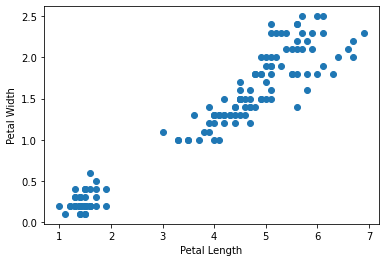

In [135]:
X_petlen = X[:, 2]
X_petwid = X[:, 3]
scat = plt.scatter(X_petlen, X_petwid, cmap=plt.cm.Set1)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Perform k-means clustering on the dataset not using the labels for both cases of k=2 and k=3.
Using different markers, plot the clusters obtained using k-means clustering for both scenarios.

In [139]:
def kSimpleQ4(k):
    colors = ['b', 'g', 'r']
    markers = ['o', 'v', 's']
    
    kmeans = KMeans(n_clusters=k).fit(X)
    plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 200, c = 'yellow')
    
    for i,l in enumerate(kmeans.labels_):
        plt.plot(X_petlen[i], X_petwid[i], color = colors[l], marker = markers[l])
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    
    print("K-means took " + str(kmeans.n_iter_) + " iterations to find the cetnroid")

K-means took 4 iterations to find the cetnroid


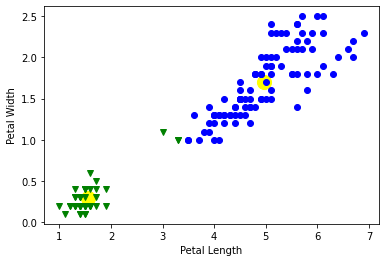

In [140]:
kSimpleQ4(2)

K-means took 4 iterations to find the cetnroid


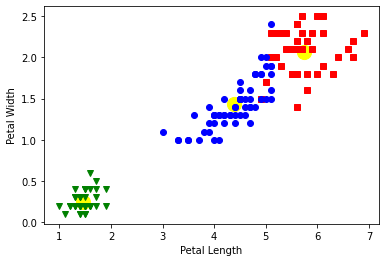

In [141]:
kSimpleQ4(3)

There is a clear separation between small flower petals and larger ones when K = 2. The model assumes that the green datapoints are clustered together. When introducing K = 3, the model manages to find a divide between medium sided flower petals and larger ones. The small petals with green datapoints remains mostly unchanged. For K = 3, the model further improves its prediction by getting rid of the extra small flower clustering and equally divides up the red and blue datapoints.

## 2. Inertia and Silhouette score
Use the following code to create five blobs 

In [97]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

Plot the blobs in a single figure

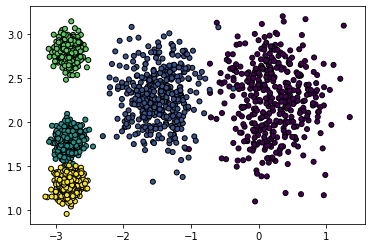

In [102]:
silho = plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

Perform k-means clustering with k=5 and random state=your group number.
Use kmeans.fit_predict to obtain the predicted values and save them in a variable.

In [119]:
kmeans2 = KMeans(n_clusters=5, random_state = 24).fit(X)
y_pred2 = KMeans(n_clusters=5, random_state = 24).fit_predict(X)

Find the cluster centroids.

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

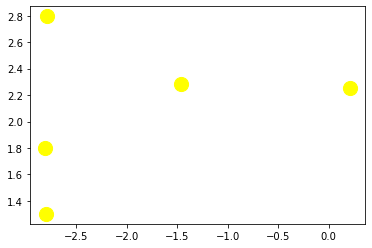

In [122]:
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 200, c = 'yellow')

for i in enumerate(kmeans2.labels_):
    plt.plot(X[:, 0][i], X[:, 1][i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Find the label of an instance that instance gets assigned to.

In [117]:
kmeans2.cluster_centers_[:, 1]

array([2.28585348, 1.30082566, 2.25551336, 1.80117999, 2.79641063])


Calculate the inertia to evaluate the k-mean model performance.

Set the number of clusters for k-means clustering once to a lower and once to a greater value than 5. Perform k-means clustering for both scenarios. Evaluate the model's performance for both using inertia.

Plot inertia as a function of 1<k<11.

Plot silhouette score as a function of 1<k<11.
In your report, discuss which k value is the best. Bring reasons to support your ideas.

## 3. Using Clustering for Image Segmentation
Download the ladybug image, read and plot it in this section.

Find the shape of the image

The array of the image is reshaped to get a long list of RGB colors. Perform clustering on the image using K-Means with number of colors=8 (i.e. k=8) and random_state=42. 

Perform k-means clustering using 10, 8, 6, 4, 2 on the same image with the same randoms state value and plot the results along with the original image side by side. You will end up with 6 images in total. 


## Using clustering for pre-processing
Run the following section to get access to the train and test data. 

In [6]:

from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)


Fit a Logistic Regression model with the following parameters and evaluate it on the test set. Print out the logistic regression score value.
multi_class="ovr", solver="lbfgs", max_iter=3000, random_state=40

In [7]:
from sklearn.linear_model import LogisticRegression


Complete the code below to create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to the 50 clusters, then apply a logistic regression model:

In [8]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])


Check the pipeline score on test set to see if there were any improvements compared to the logistic regression model.

How much did the score change? Print out the percentage.

## 5. Semi-supervised learning
The performance of a logistic regression model when we only have 50 labeled instances:

In [9]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
X_train_5 = X_train[:n_labeled]
y_train_5 = y_train[:n_labeled]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train_5, y_train_5)
log_reg.score(X_test, y_test)

0.8333333333333334

Cluster the training set into 50 clusters. 
For each cluster, find the image closest to the centroid. We will call these images the representative images. Complete the code below:

In [14]:
from sklearn.cluster import KMeans

kmean_ss = KMeans(n_clusters=n_labeled)
X_dist = kmean_ss.fit_transform(X_train_5)
rep_idx = np.argmin(X_dist, axis=0) 
X_rep = X_train[rep_idx]


Plot these 50 representative images.

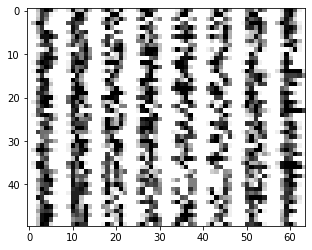

In [15]:
plt.imshow(X_rep, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show() 

Label these 50 representative images manually:

In [16]:
y_rep = [list(y_train_5)[x] for x in rep_idx]

Now we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Perform logistic regression using the respresentative images and labels. Print out the logistic regression score value on the test set. How much did the results improve?

In [17]:
log_reg_5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter = 3000, random_state=42)
log_reg_5.fit(X_rep, y_rep)
log_reg_5.score(X_test, y_test)


0.8333333333333334